In [2]:
import sys
sys.path.append('../source/')
import data_readers
import networkx as nx
import math
import collections
import matplotlib.pyplot as plt
import numpy as np
import copy
import warnings
import pandas as pd
from tabulate import tabulate
from collections import OrderedDict
from operator import itemgetter
import operator


warnings.filterwarnings('ignore')

In [32]:
G = nx.read_gexf("../source/coauthorship_634.gexf")
deputies_dict = data_readers.getDeputies()

In [33]:
from GraphAnalysis import GraphAnalysis
ga = GraphAnalysis(G)
ga.setDeputiesList(deputies_dict)

In [34]:
edges_w = {}

for edge in G.edges(data=True):
    edges_w[(edge[0],edge[1])] = edge[2]['weight']
    
w_ordered = sorted(edges_w.items(),key = operator.itemgetter(1),reverse = True)

w_values = list(edges_w.values())

print(np.mean(w_values))
print(min(w_values))
print(max(w_values))


1.4840521564694082
1.0
15.0


In [35]:
proposal_authors = data_readers.getAuthors()
proposals = data_readers.getProposals()

In [36]:
from ProposalAnalysis import ProposalAnalysis
inf = ProposalAnalysis(proposal_authors, proposals)
proposal_info = inf.getProposalAuthorsInfo(ga)

In [37]:
len(proposal_info)

11139

In [38]:
proposal_a = {}

for key,value in proposal_info.items():
    proposal_a[key] = value['authors_number']
    if(value['authors_number'] == 34):
        print(key)
        print(value)
    
p_ordered = sorted(proposal_a.items(),key = operator.itemgetter(1),reverse = True)

p_values = list(proposal_a.values())

print(np.mean(p_values))
print(min(p_values))
print(max(p_values))


1280773
{'authors_number': 34, 'pagerank': 0.13968546505073307, 'authors_weight': 403, 'authors_heterogeneity': -0.2743191254429937}
2175563
{'authors_number': 34, 'pagerank': 0.11028945376424731, 'authors_weight': 704, 'authors_heterogeneity': -0.3185525100523522}
1.0935452015441243
1
37


In [48]:
data = np.zeros(int(max(p_values)+1))
for i in range(len(data)):
    i_count  = p_values.count(i)
    data[i] = i_count

In [60]:
len(proposal_a)

11139

In [61]:
1/11139

8.977466558937069e-05

In [49]:
data[37]

1.0

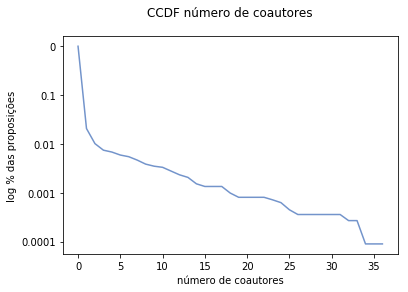

In [72]:
cumulative = np.cumsum(data)
color = '#7394CB'
labels = {"title": 'CCDF número de coautores','xlabel': 'número de coautores', 'ylabel': 'log % das proposições'}
ccdf = []
for element in cumulative:
    prob = (element - cumulative[0])/(max(cumulative)-min(cumulative))
    ccdf.append(np.log10(1 - prob))    
label = list(range(len(data)))

fig, ax = plt.subplots()

plt.plot(label, ccdf, color= color)
plt.title(labels['title'])
plt.yticks([0,-1,-2,-3,-4])
labels_y = [item.get_text() for item in ax.get_yticklabels()]
labels_y = ['0','0.1','0.01','0.001','0.0001']

ax.set_yticklabels(labels_y)
plt.xlabel(labels['xlabel'])
plt.ylabel(labels['ylabel'])
plt.show()

In [9]:
len(p_values)

11139

In [55]:
58402/12190

4.790976210008203

In [11]:
sorted(p_values,reverse=True)[:10]

[37, 34, 34, 32, 26, 25, 25, 24, 23, 19]

weights = ga.getSumEdgeWeights()
w_sum = sum(list(weights.values()))
sizes = sorted(weights.items(),key = operator.itemgetter(1),reverse = True)
total_w = 0
result = {}
for i in range(len(sizes)):
    node_info = ga.getDeputyInfo(sizes[i][0])
    party = node_info[1]['party']
    if party in result:
        result[party] += sizes[i][1]
    else:
        result[party] = sizes[i][1]
    total_w += sizes[i][1]
       
normalized_result = {k: v / total_w for k, v in result.items()}
sorted_result = sorted(normalized_result.items(),key = operator.itemgetter(1),reverse = True)
print(sorted_result)
dominance = 0
for i in range(3):
    dominance += sorted_result[i][1]
print(dominance)

## Características gerais da rede

In [5]:
ga.getSummary()

Número de vértices : 633
Número de arestas : 4985
Densidade : 0.024921510988461616
Número de componentes conexas : 276
Coeficiente de clusterização : 0.39792581288116224
Tamanho da maior componente conexa : 356
Tamanho relativo da maior componente conexa : 0.5624012638230648
Maior grau : 0
menor grau : 101
Grau médio : 15.750394944707741
Vértices com grau zero : 273


In [24]:
adj_m, _ = ga.adjMatrix()
adj_m.sum()/2

4985.0

**Exemplo da estrutura de um vértice**

In [16]:
sample_node = ga.getDeputyInfo("141401")
print(sample_node)

('141401', {'style': 'filled', 'weight': 207, 'party': 'MDB', 'uf': 'MT', 'age_range': 4, 'sex': 'M', 'education': 'Superior', 'age': 77, 'education_tse': 'SUPERIOR COMPLETO', 'ethnicity': 'BRANCA', 'label': 'CARLOS BEZERRA'})


## Distribuição de grau

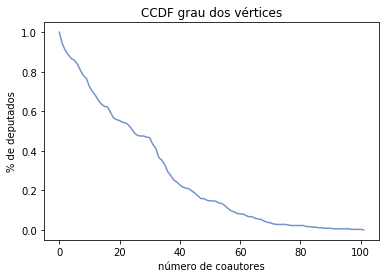

In [6]:
    ga.plotDegreeDistribution()

## Distribuição de peso

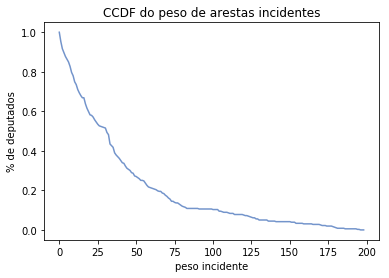

In [7]:
ga.plotWeightDistribution()

## Modulariade

In [12]:
adj_matrix, m_map  = ga.adjMatrix(True)
print(ga.joinEdgesAttFraction('sex', adj_matrix, m_map))
print('-----')
print(ga.incidenceEdgesAttFraction('sex', True))

{'M': 0.7837253311705866, 'F': 0.021221951878886185}
-----
{'M': 0.8812516896458502, 'F': 0.11874831035414977}


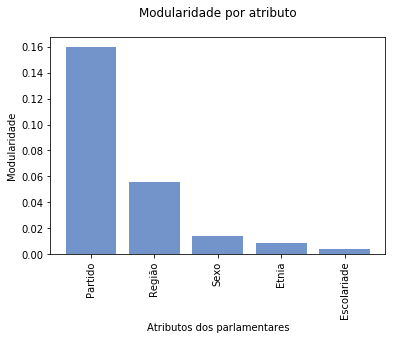

In [13]:
raw_dict = ga.modularitySummary(weighted = True)
modularity_dict = {}

# Seleciona atributos a serem usados e renomeia
modularity_dict['Partido'] = raw_dict['party'][0]
modularity_dict['Região'] = raw_dict['uf'][0]
modularity_dict['Sexo'] = raw_dict['sex'][0]
modularity_dict['Etnia'] = raw_dict['ethnicity'][0]
modularity_dict['Escolariade'] = raw_dict['education_tse'][0]

ga.plotDict(dict = modularity_dict,labels = {"title":"Modularidade por atributo",
                                       "xlabel":"Atributos dos parlamentares",
                                        "ylabel":"Modularidade"
                                      }, save = True)

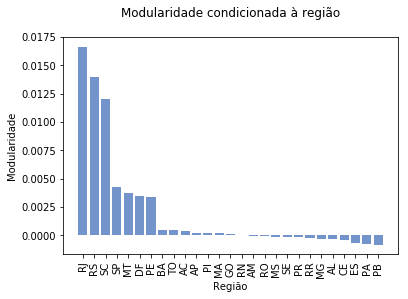

In [18]:
conditional_dict = raw_dict['uf'][1]
modularity_conditioned = sorted(conditional_dict.items(),key = operator.itemgetter(1),reverse = True)
ordered_dict = {}
for element in modularity_conditioned:
    ordered_dict[element[0]] = element[1]
ga.plotDict(dict = ordered_dict,labels = {"title":"Modularidade condicionada à região",
                                       "xlabel":"Região",
                                        "ylabel":"Modularidade"
                                      }, save = True)

## Mixagem

In [8]:
ga.mixingMatrix('ethnicity', weighted = True, norm = True)

(array([[0.84180745, 0.11826045, 0.0399321 ],
        [0.81413467, 0.13912076, 0.04674457],
        [0.7866242 , 0.13375796, 0.07961783]]),
 {'BRANCA': 0, 'PARDA': 1, 'PRETA': 2})

## Distribuição dos valores dos atributos

### Valor absoluto

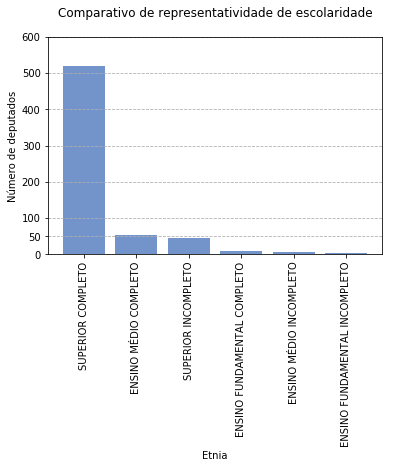

In [51]:
counts = ga.countNodesByAttribute()['education_tse']
node_count = sorted(counts.items(),key = operator.itemgetter(1),reverse = True)
ordered_dict = {}
for element in node_count:
    ordered_dict[element[0]] = element[1]
ga.plotDict(dict = ordered_dict, labels = {"title":"Comparativo de representatividade de escolaridade",
                                       "xlabel":"Etnia",
                                        "ylabel":"Número de deputados"
                                      }, y_grid = True, save = True,y_extra_ticks = [50])


### Valor percentual

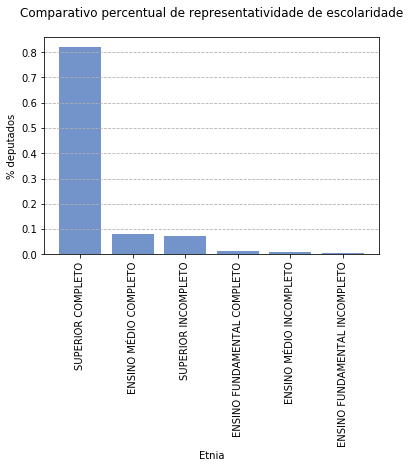

In [52]:
base_count = ga.countNodesByAttribute()['education_tse']
total = sum(list(base_count.values()))
counts = {k: v / total for k, v in base_count.items()}

node_count = sorted(counts.items(),key = operator.itemgetter(1),reverse = True)
ordered_dict = {}
for element in node_count:
    ordered_dict[element[0]] = element[1]
ga.plotDict(dict = ordered_dict, labels = {"title":"Comparativo percentual de representatividade de escolaridade",
                                       "xlabel":"Etnia",
                                        "ylabel":"% deputados"
                                      }, y_grid = True, save = True)


### Gera tabelas gerais

In [53]:
selected_attributes = ['uf','ethnicity','education_tse','party', 'sex']
for att in selected_attributes:
    node_count = ga.countNodesByAttribute()[att]
    total = sum(list(node_count.values()))
    normalized_count = {k: v / total for k, v in node_count.items()}
    ga.saveTable([node_count,normalized_count],['Valor absoluto','Valor relativo'], 'quantidades_'+ att)

## Modularidade individual

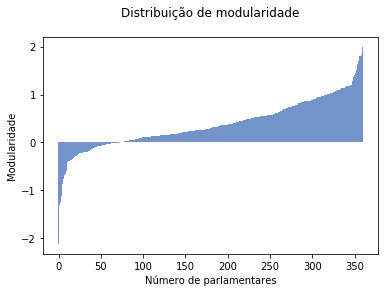

In [22]:
individual_modularity = ga.nodesModularity(use_weight = True)
srt_dict = {k: v for k, v in sorted(individual_modularity.items(), key=lambda x: x[1])}

ga.plotDict(dict = srt_dict,labels = {"title":"Distribuição de modularidade",
                                       "xlabel":"Número de parlamentares",
                                        "ylabel":"Modularidade"
                                      }, save = True, fill_gap = True, use_x_ticks = False)


col_names = ['id_deputado','nome_deputado', 'homofilia']
dps_list = list(srt_dict.keys())
h_list = list(srt_dict.values())
dep_names = []
for deputy_id in dps_list:
    dep_names.append(ga.getDeputyInfo(deputy_id)[1]['label'])
    
cl_l = [dps_list,dep_names, h_list,]
ga.saveTable(cl_l, col_names, 'homofilia_individual_geral')

In [28]:
print(ga.getThresholdCounts(srt_dict, 0, 0.5))

{'minor': 10, 'equal': 218, 'bigger': 132}


### Modularidade individual por atributo

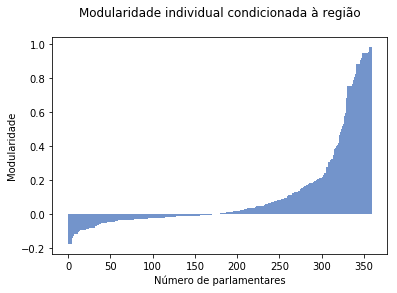

In [30]:
att = 'uf'
individual_modularity_att = ga.nodesModularityByAttribute(att, weighted = True)

mod_ind = {}
for key, value in individual_modularity_att.items():
    if(value != None):
        mod_ind[key] = value
        
sorted_dict = {k: v for k, v in sorted(mod_ind.items(), key=lambda x: x[1])}

ga.plotDict(dict = sorted_dict,labels = {"title":"Modularidade individual condicionada à região",
                                       "xlabel":"Número de parlamentares",
                                        "ylabel":"Modularidade"
                                         }, save = True, fill_gap = True, use_x_ticks = False)

column_names = ['id_deputado','nome_deputado', 'homofilia']
deputies_list = list(sorted_dict.keys())
hom_list = list(sorted_dict.values())
dep_names = []
for deputy_id in deputies_list:
    dep_names.append(ga.getDeputyInfo(deputy_id)[1]['label'])
    
column_list = [deputies_list,dep_names, hom_list,]
ga.saveTable(column_list, column_names, 'homofilia_individual_'+att)

In [17]:
print(ga.getThresholdCounts(mod_ind, 0, 0.1))

{'minor': 41, 'equal': 240, 'bigger': 79}


In [20]:
ga.getDeputyInfo('73701')

('73701',
 {'age': 76,
  'age_range': 4,
  'education': 'Superior',
  'education_tse': 'SUPERIOR COMPLETO',
  'ethnicity': 'PRETA',
  'label': 'BENEDITA DA SILVA',
  'party': 'PT',
  'sex': 'F',
  'style': 'filled',
  'uf': 'RJ',
  'weight': 8})

In [19]:
negh = G.neighbors('73701')

for n in negh:
    print(ga.getDeputyInfo(n))
    print('\n')

('178945', {'style': 'filled', 'weight': 14, 'party': 'PRB', 'uf': 'RJ', 'age_range': 3, 'sex': 'F', 'education': 'Pós-Graduação', 'age': 52, 'education_tse': 'SUPERIOR COMPLETO', 'ethnicity': 'PRETA', 'label': 'ROSANGELA GOMES'})


('178862', {'style': 'filled', 'weight': 23, 'party': 'PRB', 'uf': 'BA', 'age_range': 2, 'sex': 'F', 'education': 'Superior', 'age': 46, 'education_tse': 'SUPERIOR COMPLETO', 'ethnicity': 'PRETA', 'label': 'TIA ERON'})




## Similaridade

### Similaridade de jaccard

Too low data to compute Jaccard on:  null
Too low data to compute Jaccard on:  AMARELA
{'BRANCA': 0.02108968200741394, 'PARDA': 0.009626142379301681, 'PRETA': 0.035202667320745125}


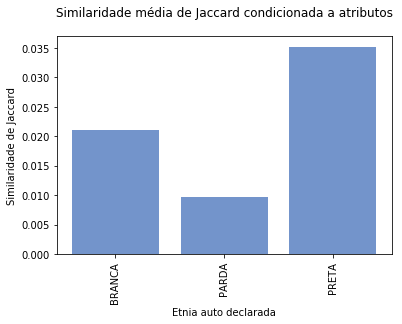

In [17]:
jc = ga.jaccardByAttribute('ethnicity')
print(jc)
# jc['<30'] = jc.pop(1)
# jc['30-50'] = jc.pop(2)
# jc['50-65'] = jc.pop(3)
# jc['>65'] = jc.pop(4)
ga.plotDict(dict = jc, labels = {"title":"Similaridade média de Jaccard condicionada a atributos",
                                       "xlabel":"Etnia auto declarada",
                                        "ylabel":"Similaridade de Jaccard"
                                      }, save = True)

## Métrica Bursztyn

In [4]:
att = 'ethnicity'

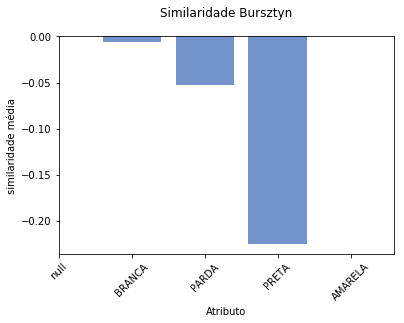

In [10]:
jc = ga.conditionalHomophilyDict(att,False)
ga.plotDict(dict = jc,labels = {"title":"Similaridade Bursztyn",
                                       "xlabel":"Atributo",
                                        "ylabel":"similaridade média"
                                      }, save = True)

## Weighted Balance Similarity

**Nova métrica proposta**

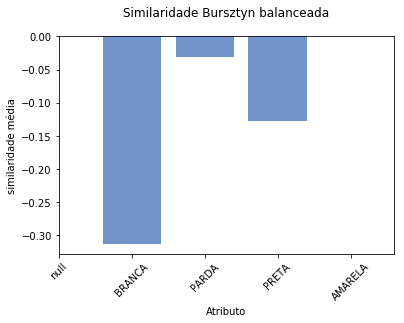

In [9]:
jc2 = ga.conditionalHomophilyDict(att, True)
ga.plotDict(dict = jc2,labels = {"title":"Similaridade Bursztyn balanceada",
                                       "xlabel":"Atributo",
                                        "ylabel":"similaridade média"
                                      }, save = True)

## Heteregeneidade

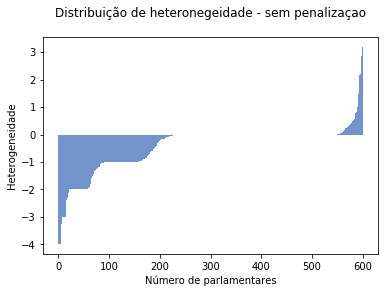

{'bigger': 46, 'equal': 323, 'minor': 231}

In [10]:
nodes_heterogeneity = ga.getHeterogeneity(['uf', 'party','ethnicity','sex','education_tse'], True)
sorted_dict = {k: v for k, v in sorted(nodes_heterogeneity.items(), key=lambda x: x[1])}

ga.plotDict(dict = sorted_dict,labels = {"title":"Distribuição de heteronegeidade",
                                       "xlabel":"Número de parlamentares",
                                        "ylabel":"Heterogeneidade"
                                      }, save = True, fill_gap = True, use_x_ticks = False)

ga.getThresholdCounts(nodes_heterogeneity, 0,0.01)

## Pagerank

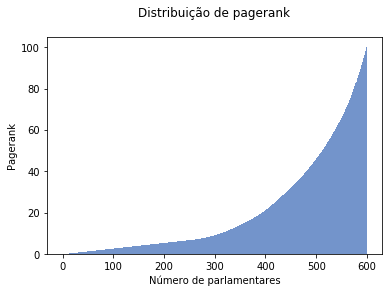

In [18]:
from numpy import cumsum
from operator import itemgetter

nodes_heterogeneity = ga.getPageRank()
sorted_dict = {k: v for k, v in sorted(nodes_heterogeneity.items(), key=lambda x: x[1])}


#unzip keys from values in a sorted order
keys, values = zip(*sorted(sorted_dict.items(), key=itemgetter(1)))
total = sum(values)

# calculate cumsum and zip with keys into new dict
d_cump = dict(zip(keys, (100*subtotal/total for subtotal in cumsum(values))))



ga.plotDict(dict = d_cump,labels = {"title":"Distribuição de pagerank",
                                       "xlabel":"Número de parlamentares",
                                        "ylabel":"Pagerank"
                                      }, save = True, fill_gap = True, use_x_ticks = False)


In [11]:
max_key = max(nodes_heterogeneity, key= lambda k: nodes_heterogeneity[k])
max_value = nodes_heterogeneity[max_key]
print('O deputado com maior heterogeidade é ', ga.getDeputyInfo(max_key),' com valor: ', max_value)
print('\n')
min_key = min(nodes_heterogeneity, key= lambda k: nodes_heterogeneity[k])
min_value = nodes_heterogeneity[min_key]
print('O deputado com menor heterogeidade é ', ga.getDeputyInfo(min_key),' com valor: ', min_value)

O deputado com maior heterogeidade é  ('74171', {'style': 'filled', 'weight': 11, 'party': 'PSOL', 'uf': 'RJ', 'age_range': 4, 'sex': 'M', 'education': 'Mestrado', 'age': 69, 'education_tse': 'SUPERIOR COMPLETO', 'ethnicity': 'PARDA', 'label': 'CHICO ALENCAR'})  com valor:  3.193875840934665


O deputado com menor heterogeidade é  ('74161', {'style': 'filled', 'weight': 30, 'party': 'PT', 'uf': 'MG', 'age_range': 2, 'sex': 'M', 'education': 'Superior', 'age': 45, 'education_tse': 'SUPERIOR COMPLETO', 'ethnicity': 'BRANCA', 'label': 'REGINALDO LOPES'})  com valor:  -4.0
